# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, time e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [19]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

import patsy

In [3]:
# Carregando base de dados
tips = sns.load_dataset('tips')
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['net_bill'] = tips['total_bill'] - tips['tip']

# Removendo outliers
tips['tip'] = [tip if tip <= 5 else np.nan for tip in tips['tip']]
tips.dropna(inplace=True)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,20.98


In [4]:
# Criando uma matriz de design
y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)

In [5]:
# Criando um modelo de regressão múltipla
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     19.60
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           8.02e-14
Time:                        14:38:36   Log-Likelihood:                -285.58
No. Observations:                 226   AIC:                             581.2
Df Residuals:                     221   BIC:                             598.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.4792      0.197      7.523      0.000       1.092       1.867
sex[T.Female]      0.1092      0.123      0.889      0.375      -0.133       0.351
smoker[T.No]       0.1221      0.120      1.018      0.310      -0.114       0.359
time[T.Dinner]     0.0396      0.132      0.300      0.764      -0.220       0.299
net_bill           0.0693      0.008      8.678      0.000       0.054       0.085
==============================================================================
Omnibus:                        2.013   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.365   Jarque-Bera (JB):                2.023
Skew:                           0.226   Prob(JB):                        0.364
Kurtosis:                       2.899   Cond. No.                         68.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As variáveis **sex**, **smoker** e **time** com um P-value maior que 0.05 não são relevantes para o modelo

In [6]:
# Criando uma nova matriz de design
new_y, new_X = patsy.dmatrices('tip ~ net_bill', tips)
new_reg = sm.OLS(new_y, new_X).fit()
new_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     77.03
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           4.37e-16
Time:                        14:38:41   Log-Likelihood:                -286.49
No. Observations:                 226   AIC:                             577.0
Df Residuals:                     224   BIC:                             583.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6522      0.136     12.119      0.000       1.384       1.921
net_bill       0.0675      0.008      8.777      0.000       0.052       0.083
==============================================================================
Omnibus:                        1.836   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.906
Skew:                           0.209   Prob(JB):                        0.386
Kurtosis:                       2.833   Cond. No.                         42.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Conta Líquida (X)')

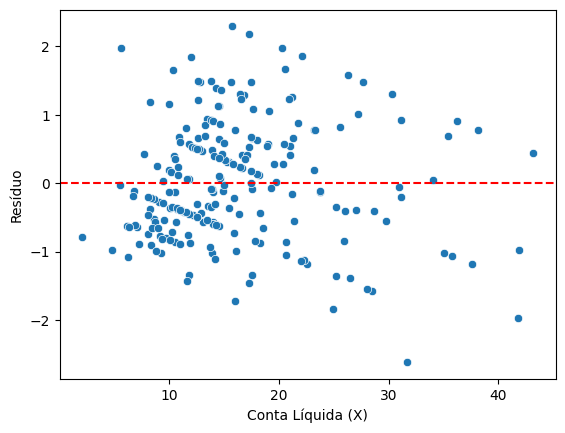

In [7]:
# Criando figura e eixo
fig, ax = plt.subplots()
# Plotando gráfico de dispersão de resíduo em relação a variável explicativa
sns.scatterplot(x=tips['net_bill'], y=new_reg.resid, ax=ax)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_ylabel('Resíduo')
ax.set_xlabel('Conta Líquida (X)')

In [8]:
# Criando modelo ajustado para log
model_log = smf.ols('tip ~ np.log(net_bill)', data=tips).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     93.83
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           9.30e-19
Time:                        14:38:44   Log-Likelihood:                -280.35
No. Observations:                 226   AIC:                             564.7
Df Residuals:                     224   BIC:                             571.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.5087      0.340     -1.497      0.136      -1.178       0.161
np.log(net_bill)     1.2118      0.125      9.687      0.000       0.965       1.458
==============================================================================
Omnibus:                        1.799   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.407   Jarque-Bera (JB):                1.719
Skew:                           0.213   Prob(JB):                        0.423
Kurtosis:                       2.971   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Criando modelo ajustado para polinômio
model_pow = smf.ols('tip ~ np.power(net_bill, 2)', data=tips).fit()
model_pow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     53.65
Date:                Sat, 22 Jun 2024   Prob (F-statistic):           4.28e-12
Time:                        14:38:46   Log-Likelihood:                -295.62
No. Observations:                 226   AIC:                             595.2
Df Residuals:                     224   BIC:                             602.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.3099      0.084     27.641      0.000       2.145       2.475
np.power(net_bill, 2)     0.0014      0.000      7.325      0.000       0.001       0.002
==============================================================================
Omnibus:                        3.979   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.137   Jarque-Bera (JB):                3.747
Skew:                           0.256   Prob(JB):                        0.154
Kurtosis:                       2.630   Cond. No.                         629.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

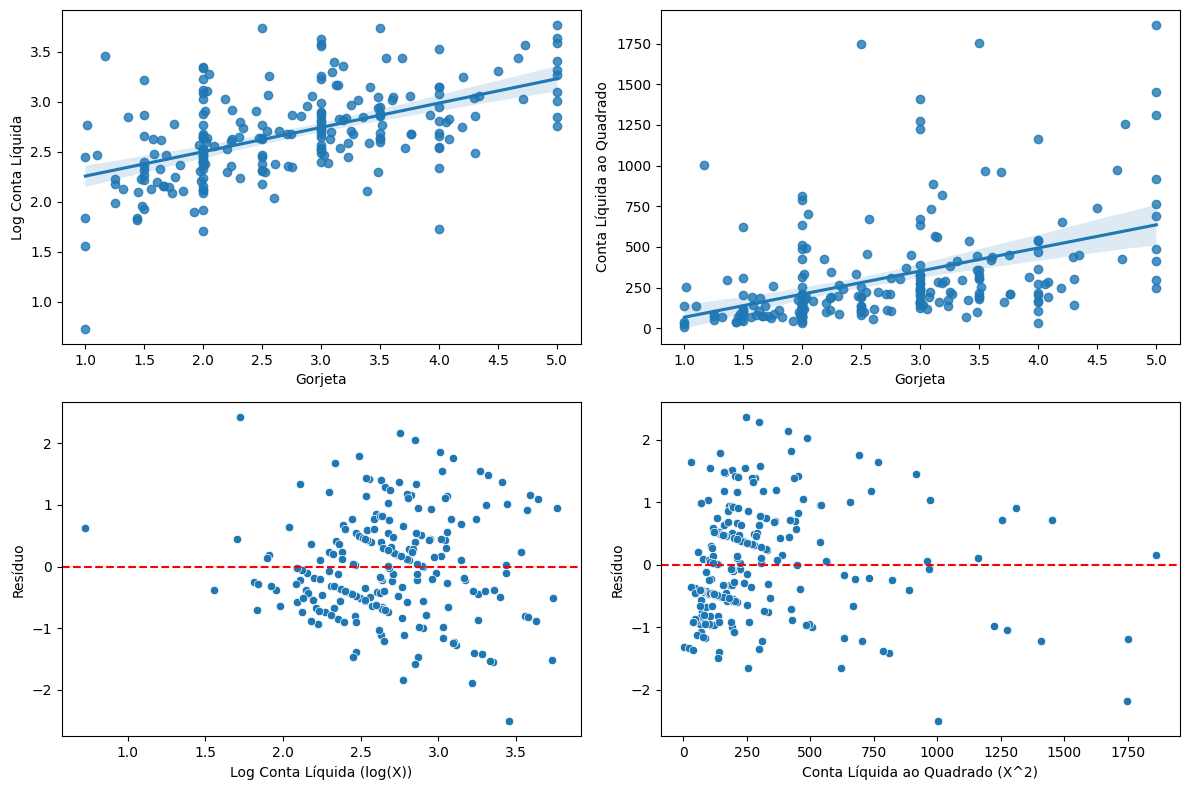

In [10]:
# Criando figura e eixos
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotando na primeira coluna de eixos os gráficos de dispersão de resíduo e regressão
sns.regplot(x=tips['tip'], y=np.log(tips['net_bill']), ax=axes[0, 0])
sns.scatterplot(x=np.log(tips['net_bill']), y=model_log.resid, ax=axes[1, 0])
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_ylabel('Resíduo')
axes[1, 0].set_xlabel('Log Conta Líquida (log(X))')
axes[0, 0].set_ylabel('Log Conta Líquida')
axes[0, 0].set_xlabel('Gorjeta')

# Plotando na segunda coluna de eixos os gráficos de dispersão de resíduo e regressão
sns.regplot(x=tips['tip'], y=np.power(tips['net_bill'], 2), ax=axes[0, 1])
sns.scatterplot(x=np.power(tips['net_bill'], 2), y=model_pow.resid, ax=axes[1, 1])
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_ylabel('Resíduo')
axes[1, 1].set_xlabel('Conta Líquida ao Quadrado (X^2)')
axes[0, 1].set_ylabel('Conta Líquida ao Quadrado')
axes[0, 1].set_xlabel('Gorjeta')

plt.tight_layout()
plt.show()

Observando os resumos e os gráficos acima, o melhor modelo entre o log de **net_bill** e o polinômio de **net_bill** é o modelo **tip ~ np.log(net_bill)**

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, time e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [12]:
# Criando matriz de design
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)

In [13]:
# Criando modelo de regressão múltipla
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     17.86
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.02e-12
Time:                        08:51:05   Log-Likelihood:                -70.548
No. Observations:                 226   AIC:                             151.1
Df Residuals:                     221   BIC:                             168.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4779      0.076      6.294      0.000       0.328       0.628
sex[T.Female]      0.0307      0.047      0.648      0.518      -0.063       0.124
smoker[T.No]       0.0475      0.046      1.025      0.306      -0.044       0.139
time[T.Dinner]     0.0116      0.051      0.228      0.820      -0.089       0.112
net_bill           0.0256      0.003      8.285      0.000       0.019       0.032
==============================================================================
Omnibus:                        5.444   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                5.273
Skew:                          -0.372   Prob(JB):                       0.0716
Kurtosis:                       3.078   Cond. No.                         68.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As variáveis não significantes são **sex**, **smoker** e **time**.

In [14]:
# Criando nova matriz de design
new_y, new_X = patsy.dmatrices('np.log(tip) ~ net_bill', tips)

In [15]:
# Criando novo modelo de regressão
new_reg = sm.OLS(new_y, new_X).fit()
new_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     70.47
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           5.32e-15
Time:                        08:51:05   Log-Likelihood:                -71.285
No. Observations:                 226   AIC:                             146.6
Df Residuals:                     224   BIC:                             153.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5372      0.053     10.210      0.000       0.433       0.641
net_bill       0.0249      0.003      8.395      0.000       0.019       0.031
==============================================================================
Omnibus:                        5.625   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.570
Skew:                          -0.385   Prob(JB):                       0.0617
Kurtosis:                       3.009   Cond. No.                         42.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 0, 'Conta Líquida (X)')

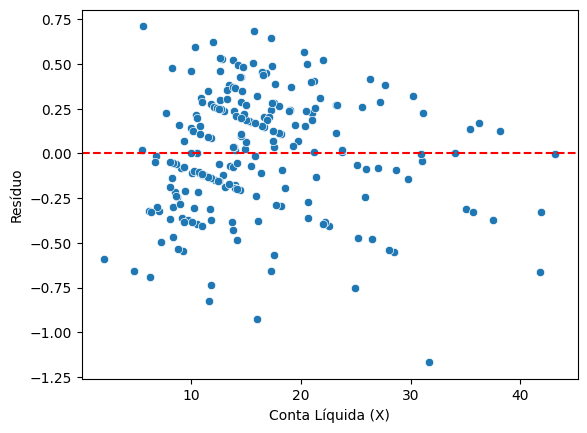

In [16]:
# Visualizando gráfico de dispersão de resíduo do modelo pela variável explicativa
fig, ax = plt.subplots()
sns.scatterplot(x=tips['net_bill'], y=new_reg.resid, ax=ax)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_ylabel('Resíduo')
ax.set_xlabel('Conta Líquida (X)')

In [17]:
# Criando modelo ajustado para log
nmodel_log = smf.ols('np.log(tip) ~ np.log(net_bill)', data=tips).fit()
nmodel_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     98.34
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.89e-19
Time:                        08:51:05   Log-Likelihood:                -61.067
No. Observations:                 226   AIC:                             126.1
Df Residuals:                     224   BIC:                             133.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3217      0.129     -2.499      0.013      -0.575      -0.068
np.log(net_bill)     0.4701      0.047      9.917      0.000       0.377       0.564
==============================================================================
Omnibus:                        7.685   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.523
Skew:                          -0.396   Prob(JB):                       0.0233
Kurtosis:                       3.415   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Criando modelo ajustado para polinômio
nmodel_pow = smf.ols('np.log(tip) ~ np.power(net_bill, 2)', data=tips).fit()
nmodel_pow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     45.17
Date:                Wed, 19 Jun 2024   Prob (F-statistic):           1.48e-10
Time:                        08:51:05   Log-Likelihood:                -81.436
No. Observations:                 226   AIC:                             166.9
Df Residuals:                     224   BIC:                             173.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7856      0.032     24.253      0.000       0.722       0.849
np.power(net_bill, 2)     0.0005    7.2e-05      6.721      0.000       0.000       0.001
==============================================================================
Omnibus:                        5.597   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.715
Skew:                          -0.369   Prob(JB):                       0.0574
Kurtosis:                       2.749   Cond. No.                         629.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

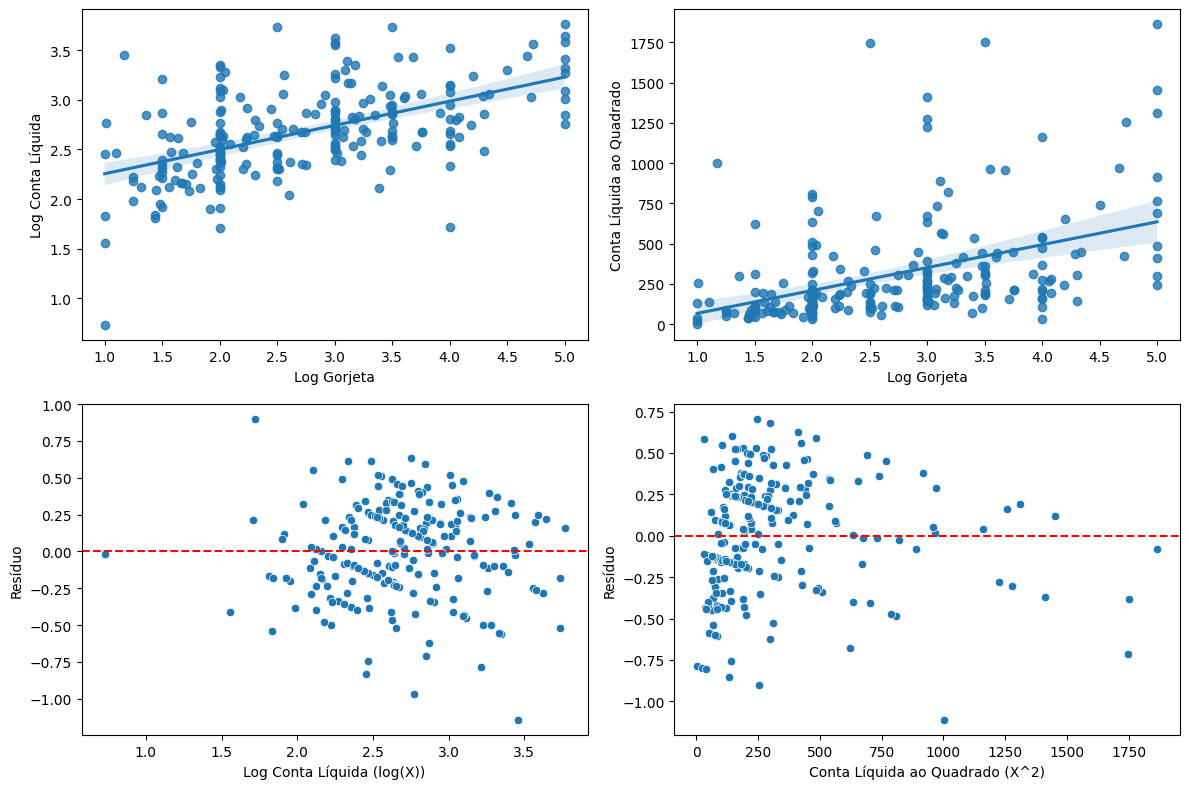

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotando na primeira coluna de eixos os gráficos de dispersão de resíduo e regressão
sns.regplot(x=tips['tip'], y=np.log(tips['net_bill']), ax=axes[0, 0])
sns.scatterplot(x=np.log(tips['net_bill']), y=nmodel_log.resid, ax=axes[1, 0])
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_ylabel('Resíduo')
axes[1, 0].set_xlabel('Log Conta Líquida (log(X))')
axes[0, 0].set_ylabel('Log Conta Líquida')
axes[0, 0].set_xlabel('Log Gorjeta')

# Plotando na segunda coluna de eixos os gráficos de dispersão de resíduo e regressão
sns.regplot(x=tips['tip'], y=np.power(tips['net_bill'], 2), ax=axes[0, 1])
sns.scatterplot(x=np.power(tips['net_bill'], 2), y=nmodel_pow.resid, ax=axes[1, 1])
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_ylabel('Resíduo')
axes[1, 1].set_xlabel('Conta Líquida ao Quadrado (X^2)')
axes[0, 1].set_ylabel('Conta Líquida ao Quadrado')
axes[0, 1].set_xlabel('Log Gorjeta')

plt.tight_layout()
plt.show()

Observando os resumos e os gráficos acima, o melhor modelo entre o log de **net_bill** e o polinômio de **net_bill** é o modelo **np.log(tip) ~ np.log(net_bill)**

In [18]:
y, x = patsy.dmatrices('tip ~ np.log(net_bill)', tips)
reg_clog = sm.OLS(y, x).fit()
print(f'O R² do modelo ajustado é {reg_clog.rsquared*100:.2f}%')

O R² do modelo ajustado é 29.52%


In [22]:
prev_clog = reg_clog.predict(x)

prev_slog = np.exp(prev_clog)

r2_original = r2_score(tips['tip'], prev_slog)
print(f'O R² na escala original é {r2_original*100:.2f}%')

O R² na escala original é -32564.89%


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [20]:
# Carregando dados
data = pd.read_csv(r'D:\Repositórios Locais\data-modeling-experiments\main\Mod 12\Exc\previsao_de_renda.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [21]:
# Verificando estrutura de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   index                  15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12466 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  mau                    15000 non-null  bool   
 14  renda                  15000 non-null  float64
dtypes:

In [22]:
# Eliminando dados faltando
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12466 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               12466 non-null  object 
 1   index                  12466 non-null  int64  
 2   sexo                   12466 non-null  object 
 3   posse_de_veiculo       12466 non-null  bool   
 4   posse_de_imovel        12466 non-null  bool   
 5   qtd_filhos             12466 non-null  int64  
 6   tipo_renda             12466 non-null  object 
 7   educacao               12466 non-null  object 
 8   estado_civil           12466 non-null  object 
 9   tipo_residencia        12466 non-null  object 
 10  idade                  12466 non-null  int64  
 11  tempo_emprego          12466 non-null  float64
 12  qt_pessoas_residencia  12466 non-null  float64
 13  mau                    12466 non-null  bool   
 14  renda                  12466 non-null  float64
dtypes: bool

In [23]:
# Criando um modelo de regressão
model1 = smf.ols('renda ~ tempo_emprego', data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:52:07   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

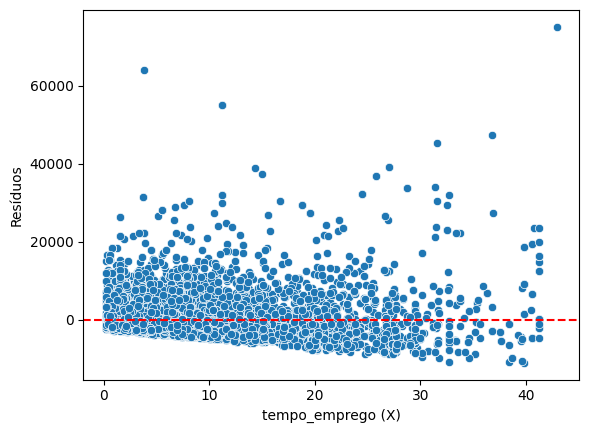

In [24]:
# Visualizando dispersão de resíduo do modelo criado

fig, ax = plt.subplots()

sns.scatterplot(x=data['tempo_emprego'], y=model1.resid, ax=ax)
ax.set_xlabel('tempo_emprego (X)')
ax.set_ylabel('Resíduos')
ax.axhline(y=0, color='r', linestyle='--')

plt.show()

Para melhorar o resíduo, podemos aplicar log de base 10 na variável **renda**

                            OLS Regression Results                            
Dep. Variable:        np.log10(renda)   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     2098.
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        08:59:32   Log-Likelihood:                -3562.6
No. Observations:               12466   AIC:                             7129.
Df Residuals:                   12464   BIC:                             7144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.3907      0.004    774.002

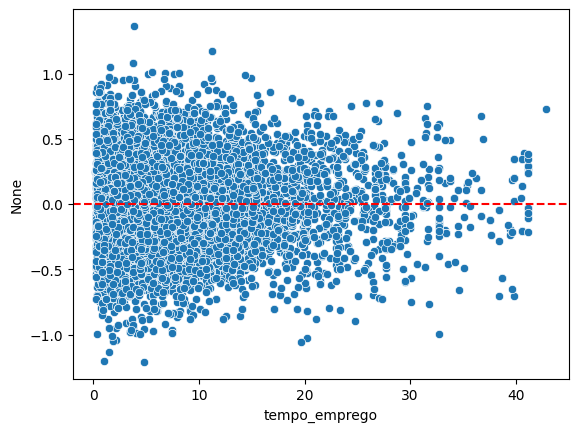

In [48]:
# Criando uma nova regressão ajustada
model2 = smf.ols('np.log10(renda) ~ tempo_emprego', data=data).fit()
print(model2.summary())
sns.scatterplot(x=data['tempo_emprego'], y=model2.resid)
plt.axhline(y=0, color='r', linestyle='--')

Como podemos observar, o modelo criado com o log na base 10 da variável resposta **renda** cria um modelo com uma melhor dispersão de resíduo mas pior acurácia. Para melhorar o modelo o mais indicado seria aumentar o número de variáveis explicativas

In [49]:
# Criando matriz de design
y, X = patsy.dmatrices('renda ~ data_ref + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + mau', data)

# Criando modelo de regressão múltipla
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     90.76
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        09:00:23   Log-Likelihood:            -1.2198e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12426   BIC:                         2.443e+05
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -184.8312   1682.790     -0.110      0.913   -3483.360    3113.698
data_ref[T.2015-02-01]              28.8921    211.111      0.137      0.891    -384.918     442.702
data_ref[T.2015-03-01]              34.5094    210.914      0.164      0.870    -378.914     447.933
data_ref[T.2015-04-01]             -50.4359    211.468     -0.239      0.811    -464.947     364.075
data_ref[T.2015-05-01]            -157.2451    209.715     -0.750      0.453    -568.319     253.829
data_ref[T.2015-06-01]               7.9744    211.744      0.038      0.970    -407.076     423.024
data_ref[T.2015-07-01]             -92.2468    211.949     -0.435      0.663    -507.699     323.206
data_ref[T.2015-08-01]            -229.9582    212.166     -1.084      0.278    -645.835     185.919
data_ref[T.2015-09-01]            -258.5927    211.251     -1.224      0.221    -672.677     155.491
data_ref[T.2015-10-01]              20.7689    210.707      0.099      0.921    -392.249     433.787
data_ref[T.2015-11-01]            -166.0106    210.843     -0.787      0.431    -579.296     247.275
data_ref[T.2015-12-01]            -374.6998    211.096     -1.775      0.076    -788.481      39.082
data_ref[T.2016-01-01]            -256.6139    210.778     -1.217      0.223    -669.771     156.544
data_ref[T.2016-02-01]              88.9340    210.967      0.422      0.673    -324.595     502.463
data_ref[T.2016-03-01]             120.9274    211.119      0.573      0.567    -292.898     534.753
sexo[T.M]                         2363.4597     88.166     26.807      0.000    2190.641    2536.278
posse_de_veiculo[T.True]           -80.6067     84.807     -0.950      0.342    -246.841      85.627
posse_de_imovel[T.True]            349.5413     83.488      4.187      0.000     185.893     513.190
tipo_renda[T.Bolsista]            -842.7460   2157.164     -0.391      0.696   -5071.122    3385.630
tipo_renda[T.Empresário]          1022.2036     90.197     11.333      0.000     845.404    1199.003
tipo_renda[T.Pensionista]         1820.5646   1459.996      1.247      0.212   -1041.253    4682.383
tipo_renda[T.Servidor público]     430.0879    130.665      3.292      0.001     173.964     686.212
educacao[T.Pós graduação]         2165.9613   1081.801      2.002      0.045      45.463    4286.460
educacao[T.Secundário]            -251.3129    437.978     -0.574      0.566   -1109.818     607.192
educacao[T.Superior completo]      341.8032    439.888      0.777      0.437    -520.445    1204.051
educacao[T.Superior incompleto]   -305.1668    471.161     -0.648      0.517   -1228.714     618.381
estado_civil[T.Separado]           152.4936    807.503      0.189      0.850   -1430.337    1735.324
estado_civil[T.Solteiro]           380.1467    792.76

In [50]:
# Criando uma nova matriz de design eliminando variáveis com pouca importância
new_y, new_X = patsy.dmatrices('renda ~ sexo + posse_de_imovel + tipo_renda + educacao + tipo_residencia + idade + tempo_emprego', data)

# Criando novo modelo de regressão múltipla
new_reg = sm.OLS(new_y, new_X).fit()
new_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     207.1
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        09:01:10   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12448   BIC:                         2.442e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          432.6463    567.947      0.762      0.446    -680.618    1545.911
sexo[T.M]                         2358.8221     82.247     28.680      0.000    2197.606    2520.038
posse_de_imovel[T.True]            355.0585     83.220      4.266      0.000     191.934     518.183
tipo_renda[T.Bolsista]            -775.8018   2154.712     -0.360      0.719   -4999.370    3447.767
tipo_renda[T.Empresário]          1020.9113     89.915     11.354      0.000     844.665    1197.158
tipo_renda[T.Pensionista]         1730.3331   1436.724      1.204      0.228   -1085.868    4546.535
tipo_renda[T.Servidor público]     443.5468    130.381      3.402      0.001     187.980     699.113
educacao[T.Pós graduação]         2248.8260   1079.826      2.083      0.037     132.201    4365.451
educacao[T.Secundário]            -223.5394    437.294     -0.511      0.609   -1080.703     633.624
educacao[T.Superior completo]      346.4178    438.835      0.789      0.430    -513.767    1206.602
educacao[T.Superior incompleto]   -280.6189    470.409     -0.597      0.551   -1202.693     641.455
tipo_residencia[T.Casa]           -359.8667    328.193     -1.097      0.273   -1003.176     283.442
tipo_residencia[T.Com os pais]    -652.1512    368.203     -1.771      0.077   -1373.886      69.583
tipo_residencia[T.Comunitário]    -612.6789    633.683     -0.967      0.334   -1854.796     629.438
tipo_residencia[T.Estúdio]        -970.0785    546.744     -1.774      0.076   -2041.781     101.624
tipo_residencia[T.Governamental]  -881.8503    397.012     -2.221      0.026   -1660.054    -103.646
idade                               26.8971      4.511      5.963      0.000      18.055      35.739
tempo_emprego                      300.1017      6.127     48.977      0.000     288.091     312.112
==============================================================================
Omnibus:                    10072.162   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           431977.451
Skew:                           3.577   Prob(JB):                         0.00
Kurtosis:                      30.937   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sexo + posse_de_imovel + tipo_renda + educacao + tipo_residencia + idade + tempo_emprego

In [68]:
df_1 = pd.get_dummies(data=data[['sexo', 'tipo_renda', 'educacao', 'tipo_residencia']])[['sexo_M', 'tipo_renda_Empresário', 'tipo_renda_Servidor público', 'educacao_Pós graduação', 'tipo_residencia_Governamental']]
df_2 = data[['posse_de_imovel', 'idade', 'tempo_emprego']]
df = pd.concat([df_1, df_2], axis=1)
df['renda'] = data['renda']
df.rename({'tipo_renda_Servidor público': 'tipo_renda_Servidor_público', 'educacao_Pós graduação': 'educacao_Pós_graduação'}, axis=1, inplace=True)
df.head()

,sexo_M,tipo_renda_Empresário,tipo_renda_Servidor_público,educacao_Pós_graduação,tipo_residencia_Governamental,posse_de_imovel,idade,tempo_emprego,renda
0,False,False,False,False,False,True,36,3.575342,3369.24
1,True,True,False,False,False,True,42,0.860274,6096.14
2,True,False,False,False,False,True,31,8.065753,5658.98
3,False,True,False,False,False,False,50,1.208219,7246.69
4,True,False,False,False,False,False,52,13.873973,4017.37


In [71]:
# Criando uma nova matriz de design apenas com as categorias de variáveis relevantes
y, X = patsy.dmatrices('renda ~ sexo_M + tipo_renda_Empresário + tipo_renda_Servidor_público + educacao_Pós_graduação + tipo_residencia_Governamental + posse_de_imovel + idade + tempo_emprego	', df)

# Criando novo modelo de regressão múltipla
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     431.2
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        09:15:25   Log-Likelihood:            -1.2202e+05
No. Observations:               12466   AIC:                         2.441e+05
Df Residuals:                   12457   BIC:                         2.441e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                60.9581    188.571      0.323      0.747    -308.670     430.587
sexo_M[T.True]                         2340.1626     82.020     28.532      0.000    2179.391    2500.934
tipo_renda_Empresário[T.True]          1065.0252     89.725     11.870      0.000     889.149    1240.901
tipo_renda_Servidor_público[T.True]     509.6536    129.758      3.928      0.000     255.307     764.000
educacao_Pós_graduação[T.True]         2252.4823    991.326      2.272      0.023     309.330    4195.635
tipo_residencia_Governamental[T.True]  -526.0677    230.755     -2.280      0.023    -978.384     -73.752
posse_de_imovel[T.True]                 398.2282     82.112      4.850      0.000     237.276     559.180
idade                                    25.5445      4.404      5.801      0.000      16.913      34.176
tempo_emprego                           299.9860      6.132     48.922      0.000     287.967     312.006
==============================================================================
Omnibus:                    10066.775   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           427822.581
Skew:                           3.578   Prob(JB):                         0.00
Kurtosis:                      30.793   Cond. No.                     1.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vamos ajustar o modelo para log e polinômio para comparar os resultados.

                            OLS Regression Results                            
Dep. Variable:        np.log10(renda)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     641.7
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        09:45:49   Log-Likelihood:                -2853.7
No. Observations:               12466   AIC:                             5721.
Df Residuals:                   12459   BIC:                             5773.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

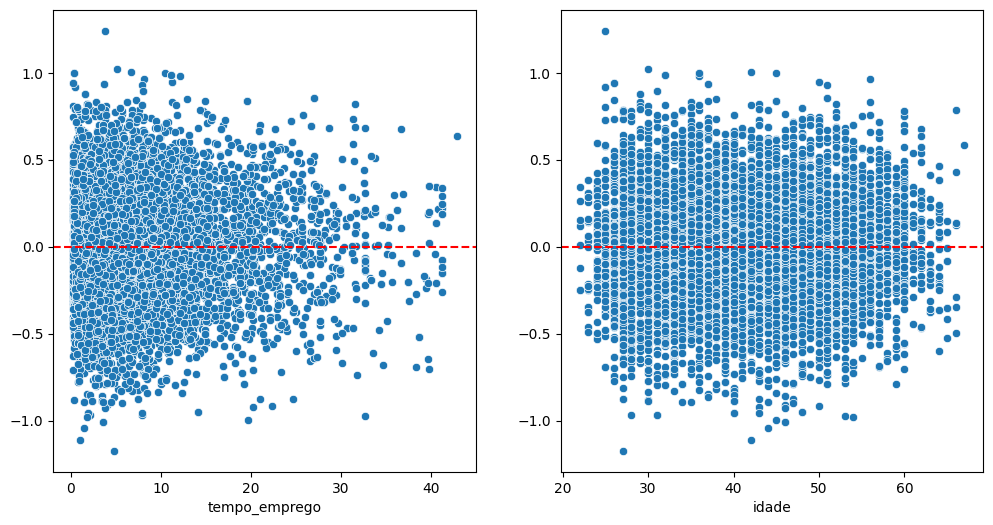

In [127]:
y, X = patsy.dmatrices('np.log10(renda) ~ idade + tempo_emprego + sexo_M + tipo_renda_Empresário + tipo_renda_Servidor_público + posse_de_imovel', df)

model_log = sm.OLS(y, X).fit()
print(model_log.summary())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.scatterplot(x=df['tempo_emprego'], y=model_log.resid, ax=ax[0])
ax[0].axhline(y=0, color='r', linestyle='--')
sns.scatterplot(x=df['idade'], y=model_log.resid, ax=ax[1])
ax[1].axhline(y=0, color='r', linestyle='--')

O modelo acima foi ajustado através da remoção de algumas variáveis que não impacatavam tanto no $R^2$ mas que diminuiam o erro do modelo (AIC). Além de ter-se aplicado o log na base 10 na variável resposta para melhorar a dispersão de resíduos das variáveis explicativas **tempo_emprego** e **idade**. Como podemos observar, o modelo final apresentou um melhor desempenho do que o modelo inicial.

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     609.1
Date:                Wed, 19 Jun 2024   Prob (F-statistic):               0.00
Time:                        10:25:54   Log-Likelihood:            -1.2194e+05
No. Observations:               12466   AIC:                         2.439e+05
Df Residuals:                   12459   BIC:                         2.439e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

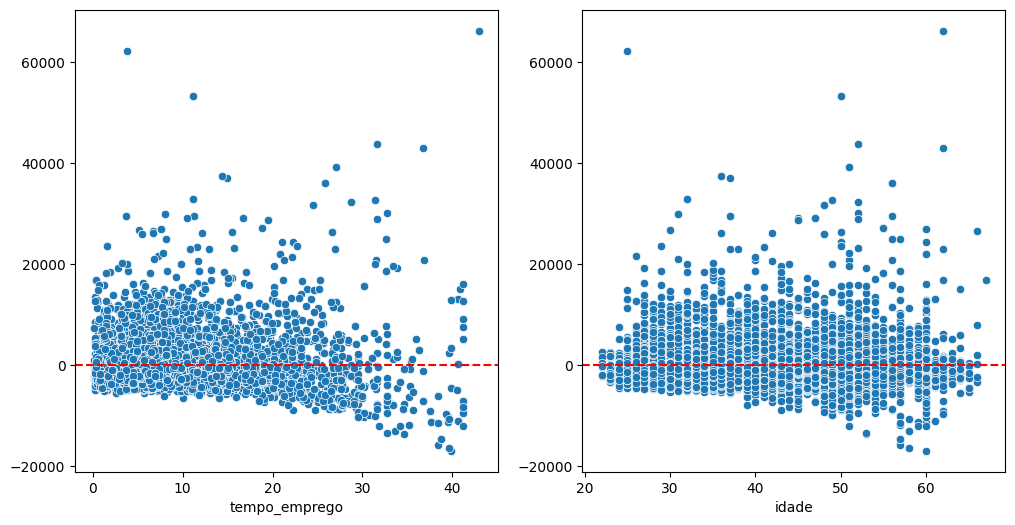

In [135]:
y, X = patsy.dmatrices('renda ~ np.power(idade, 2) + np.power(tempo_emprego, 2) + sexo_M + tipo_renda_Empresário + tipo_renda_Servidor_público + posse_de_imovel', df)

model_pow = sm.OLS(y, X).fit()
print(model_pow.summary())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.scatterplot(x=df['tempo_emprego'], y=model_pow.resid, ax=ax[0])
ax[0].axhline(y=0, color='r', linestyle='--')
sns.scatterplot(x=df['idade'], y=model_pow.resid, ax=ax[1])
ax[1].axhline(y=0, color='r', linestyle='--')

O modelo acima foi ajustado removendo as mesmas variáveis do ajuste anterior, com a diferença que nesse caso foi aplicado a potenciação das variáveis explicativas contínuas, como podemos denotar esse ajuste foi pior comparado ao anterior. Por três medições, primeiro o $R^2$ desse modelo é pior do que o $R^2$ do modelo anterior, segundo o erro desse modelo é altíssimo (alto AIC) e, por fim, a dispersão de resíduo está muito fraca comparada com o do modelo anterior. Podemos concluir então, que o ajuste anterior como log na base 10 de **renda** para as variável explicativas **idade**, **tempo_emprego**, **sexo_M**, **tipo_renda_Empresário**, **tipo_renda_Servidor_público** e  **posse_de_imovel** apresenta um melhor ajuste.